In [1]:
import tensorflow as tf
import keras
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns

In [2]:
iris_data = load_iris(as_frame=True)

features = iris_data["data"]
target = iris_data["target"]


data = pd.concat([features, target], axis=1)

interest = data.query("target != 2").iloc[:, ::2].to_numpy().astype(np.float32)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(interest[:, :2], interest[:, -1], test_size=0.2)

x_input = x_train.shape[1]

<h3>Problem 3</h3>

In [4]:
model = keras.Sequential()

model.add(keras.layers.Input((x_input,), 20))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, keras.activations.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5297 - loss: 0.6662
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.5956 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.5583 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9797 - loss: 0.5275 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9937 - loss: 0.5085 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.4682 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.4444 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4181 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3916 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3602 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3369 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3155 
Epoch 13/20
3

1/1 - 0s - 267ms/step - accuracy: 1.0000 - loss: 0.1523
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


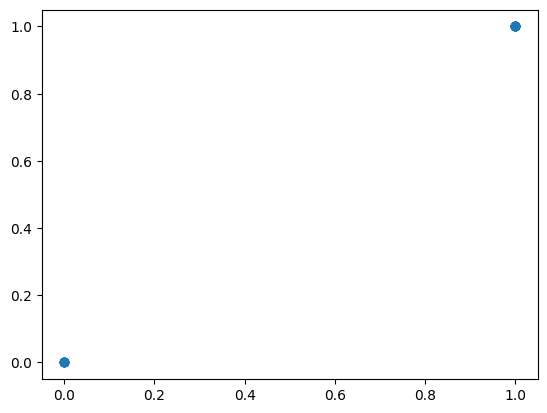

In [5]:
model.evaluate(x_test, y_test, verbose=2)

pred = model.predict(x_test)

plt.scatter(np.where(pred > 0.5, 1, 0), y_test)

<h3>Problem 4</h3>

In [6]:
class MultiClassification(keras.Model):
    def __init__(self, n_class):
        super().__init__()
        
        self.dense1 = keras.layers.Dense(100, activation="relu")
        self.dense2 = keras.layers.Dense(50, activation="relu")
        self.out = keras.layers.Dense(n_class, activation= "softmax")
    
    def call(self, input, training=False):
        x = self.dense1(input)
        x = self.dense2(x)

        return self.out(x)



In [7]:
x = features.to_numpy()
onv = OneHotEncoder(sparse_output=False)

target = target.to_numpy().reshape(-1, 1)
target = onv.fit_transform(target)
x_train, x_test, y_train, y_test = train_test_split(features.to_numpy(), target, test_size=0.2)



x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.2)


In [8]:
model = MultiClassification(3)

model.compile(optimizer="Adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=40, batch_size=20, validation_data=[x_val, y_val])


Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.2681 - loss: 1.3362 - val_accuracy: 0.6667 - val_loss: 0.9522
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6104 - loss: 0.9616 - val_accuracy: 0.5000 - val_loss: 0.8626
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7257 - loss: 0.8071 - val_accuracy: 0.5000 - val_loss: 0.8448
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7681 - loss: 0.7064 - val_accuracy: 0.5000 - val_loss: 0.8214
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7285 - loss: 0.6659 - val_accuracy: 0.5000 - val_loss: 0.7496
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7340 - loss: 0.6124 - val_accuracy: 0.5000 - val_loss: 0.6645
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7861 - loss: 0.5140 - val_accuracy: 0.5000 - val_loss: 0.6120
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7632 - loss: 0.4953 - val_accuracy: 0.5000 - val_loss: 0.5608


In [9]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9667 - loss: 0.1874


[0.18744954466819763, 0.9666666388511658]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Text(0.5, 0, ' prediction')

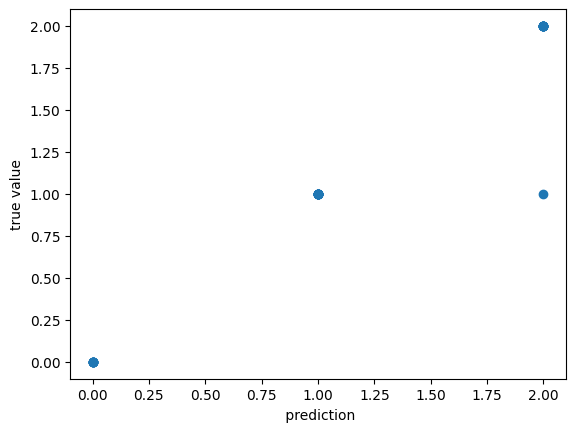

In [10]:
pred = np.argmax(model.predict(x_test), 1)

plt.scatter(pred, np.argmax(y_test, 1))
plt.ylabel("true value")
plt.xlabel(" prediction")

<h3>Problem 5</h3>

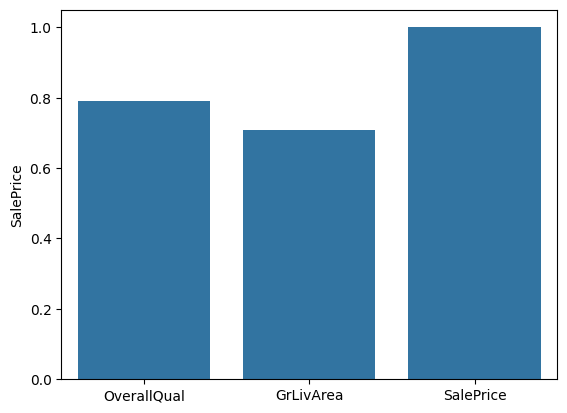

In [21]:
houseData = pd.read_csv("./data/train.csv")

potential = houseData.corr(numeric_only=True)["SalePrice"]
potential = potential[potential > 0.65]

sns.barplot(potential)

features = potential.keys()

x_train, x_test, y_train, y_test = train_test_split(houseData[features].to_numpy(), houseData["SalePrice"], test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


In [12]:
class LinearRegression(keras.Model):
    def __init__(self):
        super().__init__()
        self.layer1 = keras.layers.Dense(500)
        self.layer2 = keras.layers.Dense(250)
        self.layer3 = keras.layers.Dense(125)
        self.layer4 = keras.layers.Dense(20)
        self.out = keras.layers.Dense(1)
    
    def call(self, x_input):
        x = self.layer1(x_input)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return self.out(x)



In [24]:
linear = LinearRegression()

linear.compile(optimizer=keras.optimizers.Adam(1e-4), loss=keras.losses.mean_squared_error)
linear.fit(x_train, y_train, epochs=50, batch_size=20, validation_data=[x_val, y_val])

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7517028864.0000 - val_loss: 3686554.0000
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15654049.0000 - val_loss: 58559.0273
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 148799.3750 - val_loss: 9239.8564
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5451.5020 - val_loss: 2571.6086
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3021.7488 - val_loss: 2561.2751
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2939.4468 - val_loss: 2552.3904
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3125.4016 - val_loss: 2540.3445
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2764.2639 - val_loss: 2786.4258
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3333.3464 - val_loss: 2528.0146
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2654.4070 - val_loss: 2925.3135
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3367.1343 - val_loss: 28

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Text(0, 0.5, 'True value')

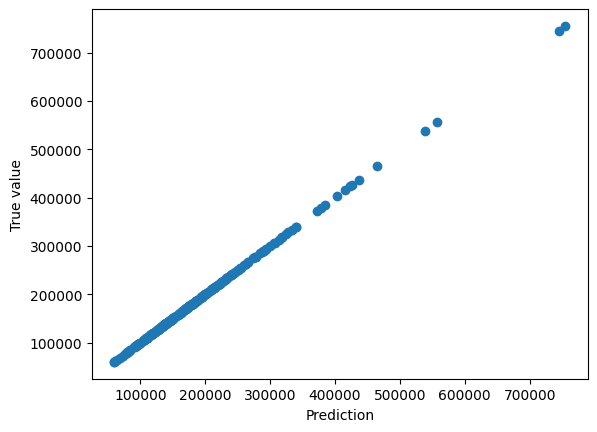

In [25]:
pred = linear.predict(x_test)

plt.scatter(pred, y_test)
plt.xlabel("Prediction")
plt.ylabel("True value")

#### Problem 6

In [15]:
from keras.datasets.mnist import load_data

In [16]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)
x_train, x_test = x_train/255, x_test/255


y_train = y_train.reshape(-1, 1)
y_train = onv.fit_transform(y_train)


In [17]:
model = MultiClassification(10)

model.compile(optimizer="Adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy", "recall"])
model.fit(x_train[:10000], y_train[:10000], epochs=50, batch_size=20)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7691 - loss: 0.8206 - recall: 0.5964
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9346 - loss: 0.2201 - recall: 0.9204
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9568 - loss: 0.1487 - recall: 0.9482
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9686 - loss: 0.1050 - recall: 0.9628
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0798 - recall: 0.9731
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0523 - recall: 0.9828
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0443 - recall: 0.9831
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9923 - loss: 0.0282 - recall: 0.9913
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0239 - recall: 0.9924
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9966 -

In [18]:
pred = np.argmax(model.predict(x_test), 1)

y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [19]:
c = sum(pred == y_test * 1)

accuracy = c/pred.shape[0]

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


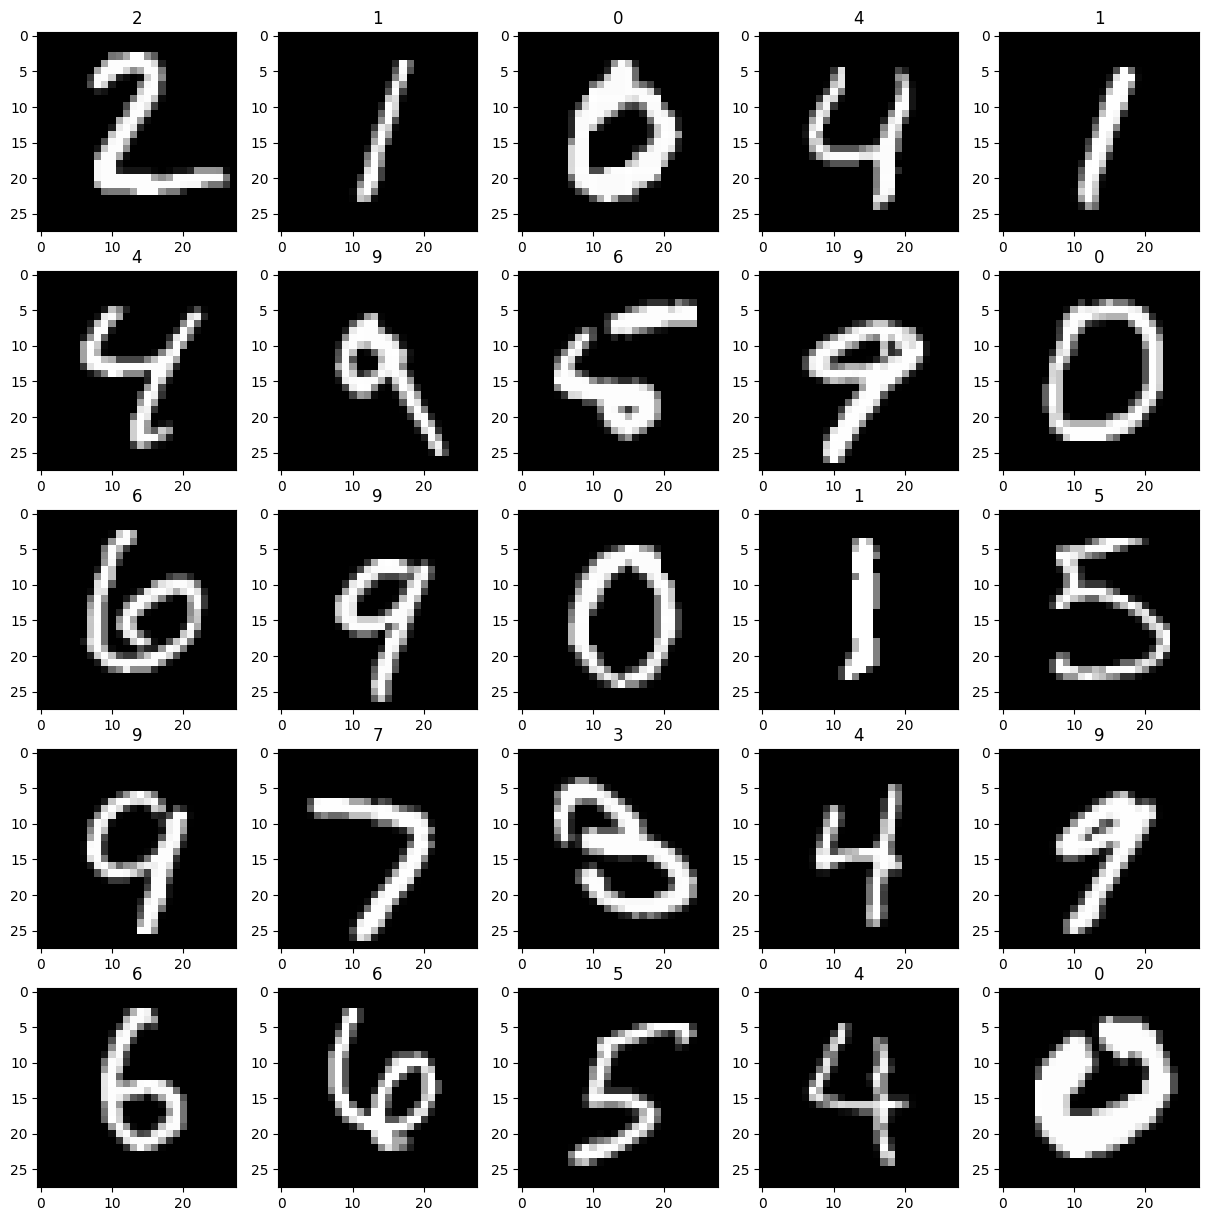

In [20]:
fig = plt.figure(figsize=(15, 15))
x_test = x_test.reshape(-1, 28, 28)
for i in range(1, 26):
    axes = plt.subplot(5, 5, i)
    axes.imshow(x_test[i], "grey")
    axes.set_title(pred[i])